In [75]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




In [76]:
UNSUPERVISED_DATA_PATH = os.getcwd() + '/data/unsupervised/'
SUPERVISED_PATH = str(os.getcwd()) + '/data/supervised'



# Load Text Data

In [10]:
data = sklearn.datasets.load_files(UNSUPERVISED_DATA_PATH)
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [11]:
data['filenames'].shape

(95,)

In [12]:
len(data['data'])

95

# TF IDF Vectorizer

Term Frequency–Inverse Document Frequency : reflect how important a word is to a document in a collection or corpus

In other words: a measure of originality of a word by comparing the number of times a word appears in a doc with the number of docs the word appears in.

In [13]:
text_files_in_tfidf = []
french_stopwords = stopwords.words('french')
vectorizer = TfidfVectorizer(analyzer='word', stop_words=french_stopwords)
X = vectorizer.fit_transform(data['data'])
X.shape

(95, 21506)

In [14]:
tokens = vectorizer.get_feature_names()

In [15]:
len(tokens)

21506

In [16]:
df_tfidfvect = pd.DataFrame(
    data=X.toarray(),
    index=data['filenames'],
    columns=tokens
)
df_tfidfvect.head()

,000,04,07,10,100,1000,1001,1002,1003,1004,...,événement,événements,évêque,évêques,ééquilibré,êtr,être,êtres,île,îles
/Users/ryanheadley/epitech/tor_2021_3/bootstrap/data/unsupervised/tous/Arlette_Laguiller_299.txt,0.000000,0.0,0.0,0.017366,0.007802,0.014704,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048838,0.000000,0.0,0.0
/Users/ryanheadley/epitech/tor_2021_3/bootstrap/data/unsupervised/tous/François_Hollande_476.txt,0.000000,0.0,0.0,0.008613,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089431,0.000000,0.0,0.0
/Users/ryanheadley/epitech/tor_2021_3/bootstrap/data/unsupervised/tous/Lionel_Jospin_497.txt,0.026070,0.0,0.0,0.008997,0.012126,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.093420,0.000000,0.0,0.0
/Users/ryanheadley/epitech/tor_2021_3/bootstrap/data/unsupervised/tous/François_Bayrou_156.txt,0.061542,0.0,0.0,0.019605,0.019818,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.044531,0.000000,0.0,0.0
/Users/ryanheadley/epitech/tor_2021_3/bootstrap/data/unsupervised/tous/Eva_Joly_339.txt,0.000000,0.0,0.0,0.010711,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048656,0.019648,0.0,0.0


This is the TD-IDF of each word per document. Click <a href="https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a">here</a> for full article explaning it all

# K-MEANS

In [17]:
k = 2
model = KMeans(
    n_clusters=k,
    init='k-means++',
    max_iter=100,
    n_init=1
)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 france
 plus
 veux
 français
 parce
 être
 si
 cette
 où
 tous
Cluster 1:
 plus
 france
 cette
 bien
 comme
 faire
 tous
 tout
 être
 aussi


In [19]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])  
X_dense = pipeline.fit_transform(data['data']).todense()

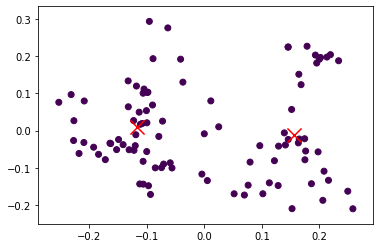

In [21]:
kmeans = KMeans(n_clusters=k).fit(X_dense)
pca = PCA(n_components=k).fit(X_dense)

data2D = pca.transform(X_dense)
fig = plt.figure(2)
plt.scatter(data2D[:,0], data2D[:,1], c=data.target)


centers2D = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')

Imagine those two Xs on the graph above haha I couldn't superimpose them and got lazy...

# NAIVE BAYES

## Attempt 1

In [42]:
def get_data(path):
    """
    Take a directory
    Loop through files to load data and determine class
    Return data
    """
    data = []
    labels = []
    le = LabelEncoder()

    for filename in os.listdir(path):
        # speaker name is first two words
        if filename[0] == ".":
            continue
        speaker = filename.split('_')
        labels.append(speaker[0] + "_" + speaker[1])
        with open(path + filename, 'r') as f:
            content = f.read().replace('\n', ' ')
        data.append(content)
    
    
    
    return list(zip(data, labels))

In [49]:
def custom_tokenizer(str):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(str)
    remove_stopwords = list(filter(lambda token: token not in stopwords.words("french"),tokens))
    lematize_words = [lemmatizer.lemmatize(word) for word in remove_stopwords]
    return lematize_words

In [57]:
def model(data_path):
    data = get_data(data_path)
    features, labels = zip(*data)

    vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
    tfidf = vectorizer.fit_transform(features)
    
    
    le = LabelEncoder()

    class_in_int = le.fit_transform(labels)
    print("classes", class_in_int)

    #split into training and test dataset
    #x_train,x_test,y_train,y_test = train_test_split(tfidf,class_in_int,test_size = 0.2,random_state=0)
    #Model Building
    classifier = MultinomialNB()
    #classifier.fit(x_train,y_train)
    classifier.fit(tfidf,class_in_int)

    pred = classifier.predict(tfidf)
    print(metrics.confusion_matrix(class_in_int,pred),"\n")
    print(metrics.accuracy_score(class_in_int,pred))
    return classifier

In [58]:
train_classifier = model(SUPERVISED_PATH + '/TRAIN/')

classes [14 10  6 13 14 22 12  7  3  2 18  0  6  1 17  5  9 17 18  7  7  6  4 14
 18  6 21 15 18 18 20 21 18 19 18  9  6 22 11  9  9  7  1  1  8  7 12 18
  5  7 19  1 18  7 16 18 11  1  6 18  1 18  9  6 18 18  7 22]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0

## Attempt 2 (with dataframe)

In [77]:
def get_row_data(path, data_type):
    """
    Take a directory
    Loop through files to load data and determine class
    Return data
    """
    rows = []

    for filename in os.listdir(path):
        # speaker name is first two words
        if filename[0] == ".":
            continue
        speaker = filename.split('_')
        speaker = speaker[0] + "_" + speaker[1]

        with open(path + "/" + filename, 'r') as f:
            content = f.read().replace('\n', ' ')
        rows.append([content, speaker, data_type])
    
    
    
    return rows

In [81]:
# prep data
columns = ['text', 'speaker', 'data_type']
train_rows = get_row_data(SUPERVISED_PATH + '/TRAIN', 'train')
test_rows = get_row_data(SUPERVISED_PATH + '/TEST', 'test')
val_rows = get_row_data(SUPERVISED_PATH + '/VAL', 'val')


train_data = pd.DataFrame(train_rows, columns=columns)
test_data = pd.DataFrame(test_rows, columns=columns)
val_data = pd.DataFrame(val_rows, columns=columns)

data = train_data.append(test_data)
data = data.append(val_data)
data.head()




,text,speaker,data_type
0,J'adresse mes excuses à ceux que je devais re...,Lionel_Jospin,train
1,http://www.lepartidegauche.fr/lateledegauche/...,Jean-Luc_Mélenchon,train
2,"Mes chers amis, je n'ai qu'un mot à dire à l'...",François_Bayrou,train
3,http://www.dailymotion.com/video/x1q0rt_disco...,José_Bové,train
4,"Mesdames et Messieurs, Mes cher(e)s camarades...",Lionel_Jospin,train


In [91]:
data['speaker'].unique()

array(['Lionel_Jospin', 'Jean-Luc_Mélenchon', 'François_Bayrou',
       'José_Bové', 'Ségolène_Royal', 'Jean-Pierre_Chevènement',
       'François_Hollande', 'Corinne_Lepage', 'Bruno_Mégret',
       'Nicolas_Sarkozy', 'Alain_Madelin', 'Arlette_Laguiller',
       'Nathalie_Arthaud', 'Eva_Joly', 'Jacques_Chirac',
       'Dominique_Voynet', 'Robert_Hue', 'Marie-George_Buffet',
       'Philippe_Poutou', 'Olivier_Besancenot', 'Jean-Marie_Le',
       'Gérard_Schivardi', 'Marine_Le'], dtype=object)

In [83]:
# Would have to create the TDM for each class (speaker) in the dataset....
stmt_docs = [row['text'] for index,row in data.iterrows() if row['data_type'] == 'train']

vec_s = CountVectorizer()
X_s = vec_s.fit_transform(stmt_docs)
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())

In [86]:
word_list = vec_s.get_feature_names()
count_list = X_s.toarray().sum(axis=0)
freq_s = dict(zip(word_list, count_list))
freq_s

{'000': 206,
 '04': 1,
 '07': 1,
 '10': 73,
 '100': 38,
 '1000': 6,
 '1001': 2,
 '1002': 1,
 '1003': 1,
 '1004': 1,
 '1005': 1,
 '1006': 1,
 '1007': 1,
 '1008': 1,
 '1009': 1,
 '1010': 1,
 '1011': 1,
 '1012': 1,
 '1013': 1,
 '1014': 1,
 '1015': 1,
 '1016': 1,
 '1017': 1,
 '1018': 1,
 '1019': 1,
 '1020': 1,
 '103': 1,
 '1039': 1,
 '1040': 1,
 '1041': 1,
 '1042': 1,
 '1043': 1,
 '1050': 1,
 '1051': 1,
 '1052': 1,
 '1053': 1,
 '1054': 1,
 '1055': 1,
 '1056': 1,
 '1057': 1,
 '1058': 1,
 '1059': 1,
 '1060': 1,
 '1061': 1,
 '1062': 1,
 '1063': 1,
 '1064': 1,
 '1065': 1,
 '1066': 1,
 '1067': 1,
 '1068': 1,
 '1069': 1,
 '107': 1,
 '1070': 1,
 '1071': 1,
 '1072': 1,
 '1073': 1,
 '1074': 1,
 '1075': 1,
 '1076': 1,
 '1077': 1,
 '1078': 1,
 '1079': 1,
 '1080': 1,
 '1081': 1,
 '1082': 1,
 '1083': 1,
 '1084': 1,
 '1085': 1,
 '1086': 1,
 '1087': 1,
 '1088': 1,
 '1089': 1,
 '1090': 1,
 '1091': 1,
 '1092': 1,
 '1093': 1,
 '1094': 2,
 '1095': 1,
 '1096': 1,
 '1097': 1,
 '1098': 1,
 '1099': 1,
 '10e': 2,

In [89]:
prob = []
for word, count in zip(word_list, count_list):
    prob.append(count/len(word_list))
dict(zip(word_list, prob))

{'000': 0.011113508847647821,
 '04': 5.3949072075960293e-05,
 '07': 5.3949072075960293e-05,
 '10': 0.003938282261545101,
 '100': 0.0020500647388864914,
 '1000': 0.00032369443245576176,
 '1001': 0.00010789814415192059,
 '1002': 5.3949072075960293e-05,
 '1003': 5.3949072075960293e-05,
 '1004': 5.3949072075960293e-05,
 '1005': 5.3949072075960293e-05,
 '1006': 5.3949072075960293e-05,
 '1007': 5.3949072075960293e-05,
 '1008': 5.3949072075960293e-05,
 '1009': 5.3949072075960293e-05,
 '1010': 5.3949072075960293e-05,
 '1011': 5.3949072075960293e-05,
 '1012': 5.3949072075960293e-05,
 '1013': 5.3949072075960293e-05,
 '1014': 5.3949072075960293e-05,
 '1015': 5.3949072075960293e-05,
 '1016': 5.3949072075960293e-05,
 '1017': 5.3949072075960293e-05,
 '1018': 5.3949072075960293e-05,
 '1019': 5.3949072075960293e-05,
 '1020': 5.3949072075960293e-05,
 '103': 5.3949072075960293e-05,
 '1039': 5.3949072075960293e-05,
 '1040': 5.3949072075960293e-05,
 '1041': 5.3949072075960293e-05,
 '1042': 5.3949072075960

In [90]:
docs = [row['text'] for index,row in data.iterrows() if row['data_type'] == 'train']

vec = CountVectorizer()
X = vec.fit_transform(docs)

total_features = len(vec.get_feature_names())
total_features

# Faudra faire cela pour chaque colonne pour vraiment avoir la réponse totale

18536

In [ ]:
total_cnts_features_s = count_list.sum(axis=0)
new_sentence = 'what is the price of the book'
new_word_list = word_tokenize(new_sentence)